In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
Dataset1 = pd.read_csv("/content/drive/MyDrive/MyPersonalDataset/customers.csv")
Dataset1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
Dataset1.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
134,135,Male,20,73,5
165,166,Female,36,85,75
196,197,Female,45,126,28
114,115,Female,18,65,48
1,2,Male,21,15,81


In [9]:
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# missing values
Dataset1.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# now we will take only 2 columns for our handson, so that we can plot the respective cluster figure

In [12]:
# plotting the figure

In [13]:
# scatter chart

[]

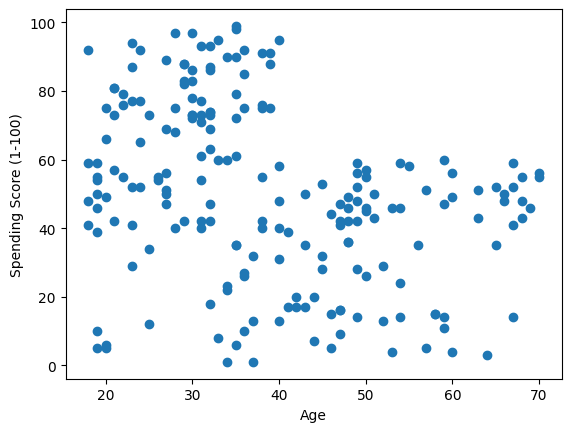

In [14]:
# matplotlib
plt.scatter(Dataset1['Age'], Dataset1['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.plot()

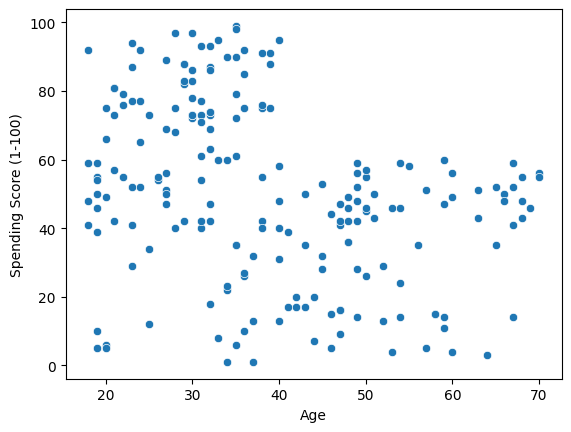

In [15]:
# seaborn library
sns.scatterplot(x = Dataset1['Age'], y = Dataset1['Spending Score (1-100)'])
plt.show()

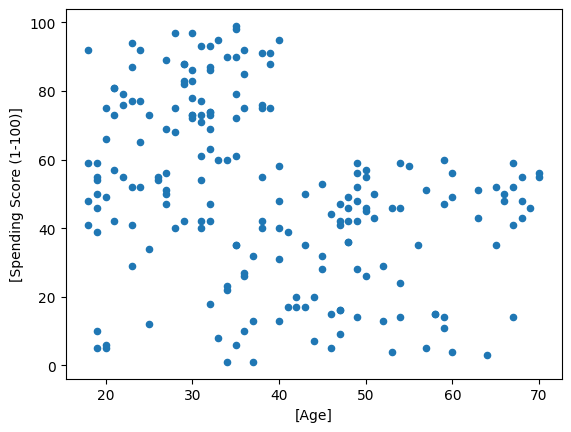

In [16]:
# scatter chart using pandas dataframe
Dataset1.plot.scatter(x = ['Age'], y = ['Spending Score (1-100)'])
plt.show()

In [17]:
# now we will combine the columns

In [18]:
X = Dataset1[['Age', 'Spending Score (1-100)']]
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [19]:
# Apply Elbow Technique
# 1. Range of k-values
# 2. Calculate the wcss value (error)
# 3. Plot the figure -> chart curve
# 4. See for abrupt change
# 5. K-value

In [20]:
from sklearn.cluster import KMeans

In [21]:
WCSS = []
for i in range(1, 11):
  model1 = KMeans(n_clusters = i)
  model1.fit(X)
  WCSS.append(model1.inertia_)
WCSS

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23830.9603937729,
 19515.469235676603,
 15551.736073262207,
 13020.084512948228,
 11520.34610781251,
 10102.691901619623]

In [22]:
# now we plot the figure

<Axes: >

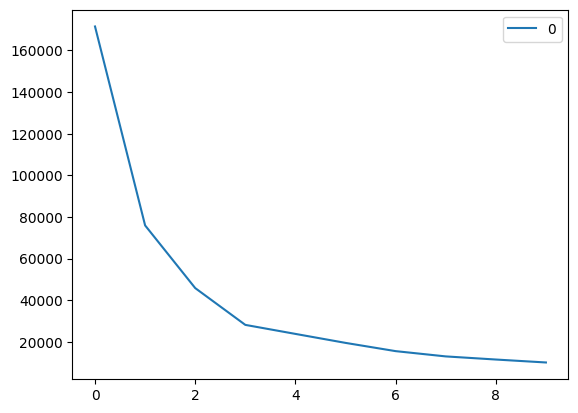

In [23]:
pd.DataFrame(WCSS).plot()

In [24]:
# from the elbow curve, the perfect number of cluster should be k=3

In [25]:
# now we will again apply K Means clustering for K = 3 only

In [26]:
model2 = KMeans(n_clusters = 3)
model2.fit(X)

KMeans(n_clusters=3)

In [27]:
# To see the cluster
label = model2.labels_
label

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [28]:
# now we will create a dataframe which will have both columns along with their cluster values
X1 = X.assign(cluster = label)
X1

,Age,Spending Score (1-100),cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

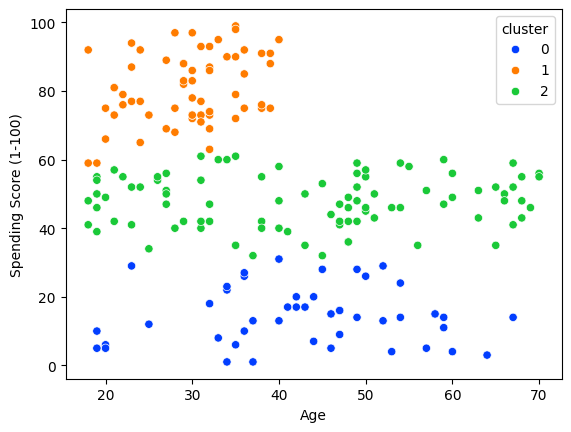

In [34]:
# plotting the figure of cluster
sns.scatterplot(x = X['Age'], y = X1['Spending Score (1-100)'], hue = X1['cluster'], palette = 'bright')

In [ ]:
# Aply KMeans for Age and Annual Income with the cluster

In [36]:
X2 = Dataset1[['Age', 'Annual Income (k$)']]
X2

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [37]:
# now we will create a dataframe which will have both columns along with their cluster values
X3 = X2.assign(cluster = label)
X3

,Age,Annual Income (k$),cluster
0,19,15,2
1,21,15,1
2,20,16,0
3,23,16,1
4,31,17,2
...,...,...,...
195,35,120,1
196,45,126,0
197,32,126,1
198,32,137,0


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

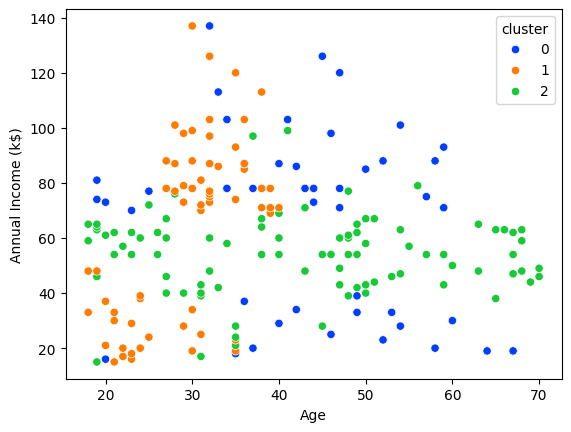

In [41]:
# plotting the figure of cluster
sns.scatterplot(x = X2['Age'], y = X3['Annual Income (k$)'], hue = X3['cluster'], palette = 'bright')